Would be testing some usecase here

In [22]:
from kan import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [23]:
# initialize KAN with G=3
model = KAN(width=[2,1,1], grid=3, k=3, seed=1, device=device)

# create dataset
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)

checkpoint directory created: ./model
saving model version 0.0


In [24]:
model.fit(dataset, opt="Adam", steps=20);

| train_loss: 1.59e+00 | test_loss: 1.50e+00 | reg: 7.49e+00 | : 100%|█| 20/20 [00:00<00:00, 109.75i

saving model version 0.1


In [25]:
# initialize a more fine-grained KAN with G=10
model = model.refine(10)

saving model version 0.2


In [26]:
model.fit(dataset, opt="Adam", steps=20);

| train_loss: 1.12e+00 | test_loss: 1.13e+00 | reg: 1.70e+01 | : 100%|█| 20/20 [00:00<00:00, 136.86i

saving model version 0.3


In [28]:
grids = np.array([3,10,20,50,100])


train_losses = []
test_losses = []
steps = 200
k = 3

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[2,1,1], grid=grids[i], k=k, seed=1, device=device)
    if i != 0:
        model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=steps)
    train_losses += results['train_loss']
    test_losses += results['test_loss']

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.35e-02 | test_loss: 1.39e-02 | reg: 1.17e+01 | : 100%|█| 200/200 [00:08<00:00, 23.93


saving model version 0.1
saving model version 0.2


| train_loss: 4.66e-04 | test_loss: 4.89e-04 | reg: 1.17e+01 | : 100%|█| 200/200 [00:06<00:00, 30.44


saving model version 0.3
saving model version 0.4


| train_loss: 4.21e-05 | test_loss: 5.68e-05 | reg: 1.17e+01 | : 100%|█| 200/200 [00:08<00:00, 23.91


saving model version 0.5
saving model version 0.6


| train_loss: 3.02e-04 | test_loss: 6.29e-04 | reg: 1.17e+01 | : 100%|█| 200/200 [00:14<00:00, 13.82


saving model version 0.7
saving model version 0.8


| train_loss: 6.57e-03 | test_loss: 2.09e-02 | reg: 1.18e+01 | : 100%|█| 200/200 [00:23<00:00,  8.45

saving model version 0.9


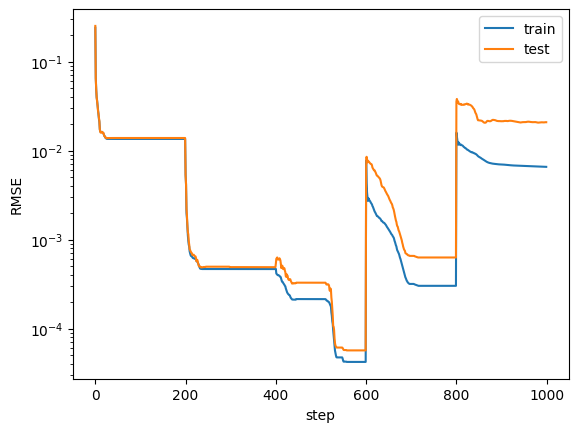

In [29]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')